# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

### Importação dos Módulos e Arquivos

In [1]:
import pandas as pd

# Ler os arquivos da Base de dados
CAMINHO_REFERENCIA    = r'.\Pandas 15 - Dados'
servicos_prestados_df = pd.read_excel(fr'{CAMINHO_REFERENCIA}\BaseServiçosPrestados.xlsx')
clientes_df           = pd.read_csv(fr'{CAMINHO_REFERENCIA}\CadastroClientes.csv',     sep=';', decimal=',')
funcionarios_df       = pd.read_csv(fr'{CAMINHO_REFERENCIA}\CadastroFuncionarios.csv', sep=';', decimal=',')

funcionarios_df = funcionarios_df.drop(columns=['Estado Civil', 'Cargo'])

display(servicos_prestados_df)
display(clientes_df)
display(funcionarios_df)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


### 1 - Calcular o valor total da Folha Salarial

In [2]:
# Abrir a tabela de funcionarios e fazer a somatórias de 3 colunas totais, salário, impostos e Benefícios
# Preferi usar a soma geral pois não usaria a informação por linha
tot_gasto_funcionarios = funcionarios_df['Salario Base'].sum() + \
      funcionarios_df['Impostos'].sum() + funcionarios_df['Beneficios'].sum() + \
      funcionarios_df['VT'].sum() + funcionarios_df['VR'].sum()
print(f'Total gasto com salários mensalmente: R${tot_gasto_funcionarios:_.2f}')


Total gasto com salários mensalmente: R$2_717_493.22


### 2 - Calcular o Faturamento


In [3]:
# Pegar a base de clientes e juntar com a base de servições a partir do id Cliente e remover as colunas desnecessárias
faturamento_df = servicos_prestados_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']] \
    .merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
# Com a tabela mesclada, multiplicar as 2 colunas (Gasto mensal e tempo) e depois somar todas as linhas
tot_faturamento = faturamento_df['Valor Contrato Mensal'] \
    .multiply(faturamento_df['Tempo Total de Contrato (Meses)']).sum()
print(f'Faturamento Total: R${tot_faturamento:_.2f}')


Faturamento Total: R$5_519_160.00


### 3 - Porcentagem de funcionarios que fecharam algum contrato


In [4]:
# Usar a base de serviços, deixar com apenas funcionários únicos e depois pegar a quantidade de serviços
tot_funcionarios_com_contrato = len(servicos_prestados_df['ID Funcionário'].unique())
# Pegar a base de funcionários e somar as entidades únicas
tot_funcionarios = len(funcionarios_df['ID Funcionário'])
print(f'Porcentagem de Funcionários com contrato: {tot_funcionarios_com_contrato / tot_funcionarios:_.2%}')

Porcentagem de Funcionários com contrato: 86.84%


### 4 - Total de contratos por área da empresa


,Quantidade de Contratos Fechados
Area,
Administrativo,63
Comercial,44
Financeiro,42
Logística,40
Operações,48


<Axes: xlabel='Area'>

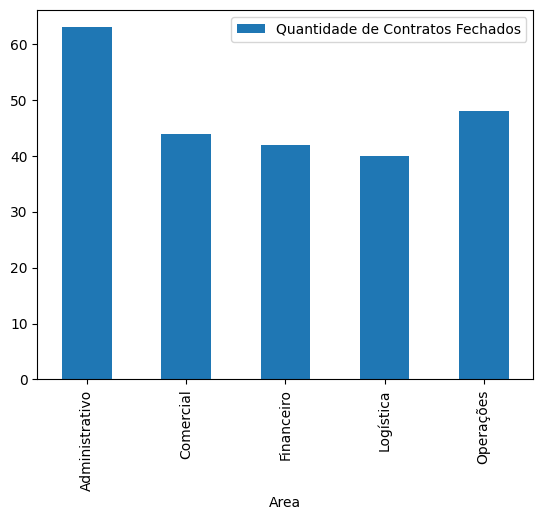

In [10]:
# Juntar as bases de Funcionários com a de Serviçoes a partir do ID de funcionários, agurpar por área e contar quantas entidades existem nessas áreas
contrato_por_area_df = servicos_prestados_df[['ID Funcionário']].merge(funcionarios_df[['Area', 'ID Funcionário']], on='ID Funcionário') \
    .groupby('Area').count().rename(columns={'ID Funcionário': 'Quantidade de Contratos Fechados'})
display(contrato_por_area_df)
contrato_por_area_df.plot(kind='bar')

### 5 - Total de Funcionários por àrea


,Quantidade de Funcinários
Area,
Administrativo,26
Comercial,26
Financeiro,18
Logística,21
Operações,23


<Axes: xlabel='Area'>

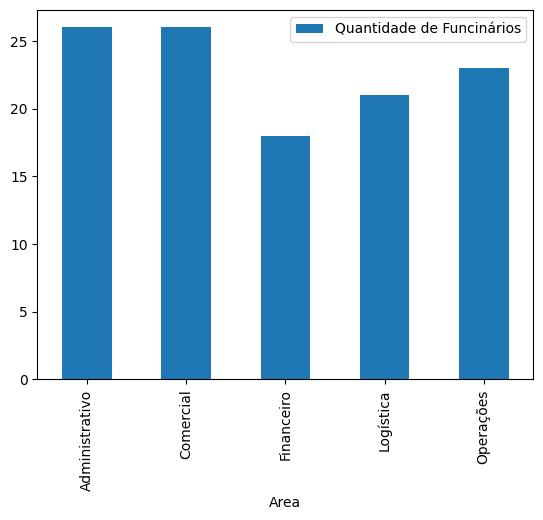

In [9]:
# Pegando a Base de Funcionários e agrupando por área, contar as entidades
funcionarios_por_area_df = funcionarios_df[['Area', 'ID Funcionário']].groupby('Area').count().rename(columns={'ID Funcionário': 'Quantidade de Funcinários'})
display(funcionarios_por_area_df)
funcionarios_por_area_df.plot(kind='bar')

### 6 - Faturamento médio dos contratos

In [7]:
# Um simples método de pegar a média do valor dos contraros na base dos clientes
valor_medio_contratos = clientes_df['Valor Contrato Mensal'].mean()
print(f'Faturamento médio dos contratos: R${valor_medio_contratos:_.2f}')

Faturamento médio dos contratos: R$2_502.56
